In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.concat(map(pd.read_csv,['2022-12-09-enriched.csv','2022-07-04-enriched.csv','2022-06-27-enriched.csv','2022-06-09-enriched.csv','2022-06-08-enriched.csv']))
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(3984, 16)

In [4]:
df.columns

Index(['cve_id', 'vendor_project', 'product', 'vulnerability_name',
       'date_added', 'short_description', 'required_action', 'due_date',
       'notes', 'grp', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity',
       'severity'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 0 to 773
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              3984 non-null   object 
 1   vendor_project      3984 non-null   object 
 2   product             3979 non-null   object 
 3   vulnerability_name  3984 non-null   object 
 4   date_added          3984 non-null   object 
 5   short_description   3954 non-null   object 
 6   required_action     3984 non-null   object 
 7   due_date            3984 non-null   object 
 8   notes               77 non-null     object 
 9   grp                 3984 non-null   int64  
 10  pub_date            3106 non-null   object 
 11  cvss                2484 non-null   float64
 12  cwe                 3090 non-null   object 
 13  vector              2484 non-null   object 
 14  complexity          2484 non-null   object 
 15  severity            2484 non-null   object 
dtypes: floa

In [6]:
df.isna().sum()

cve_id                   0
vendor_project           0
product                  5
vulnerability_name       0
date_added               0
short_description       30
required_action          0
due_date                 0
notes                 3907
grp                      0
pub_date               878
cvss                  1500
cwe                    894
vector                1500
complexity            1500
severity              1500
dtype: int64

In [7]:
df1 = df.drop(columns = ['notes','short_description'])

In [8]:
df1.isna().sum()

cve_id                   0
vendor_project           0
product                  5
vulnerability_name       0
date_added               0
required_action          0
due_date                 0
grp                      0
pub_date               878
cvss                  1500
cwe                    894
vector                1500
complexity            1500
severity              1500
dtype: int64

In [9]:
#missing value columns - product, short_description, pub_date, cvss, cwe, vector, complexity, severity

In [10]:
#imputation using mean, median and mode values

In [11]:
#unique values of product column
df1['product'].nunique()

374

In [12]:
df1['product'].unique()

array(['FTA', 'Acrobat and Reader', 'ColdFusion', 'Flash Player',
       'Cameras and Network Video Recorder (NVR)', 'Android OS', 'Struts',
       'HTTP Server', 'Shiro', 'Solr', 'iOS and iPadOS', 'FaceTime',
       'iOS', 'iOS and macOS', 'iOS Mail', 'macOS', 'Safari',
       'iOS, macOS, and iPadOS',
       'Buffalo WSR-2533DHPL2 and WSR-2533DHP3 firmware',
       'Arm Trusted Firmware', 'Mali Graphics Processing Unit (GPU)',
       'Confluence', 'Confluence Server', 'Crowd and Crowd Data Center',
       'Atlassian Confluence Server', 'BillQuick Web Suite',
       'Adaptive Security Appliance (ASA) and Firepower Threat Defense (FTD)',
       'HyperFlex HX', 'IOS and IOS XE', 'IOS XR', 'IP Phones',
       'RV320 and RV325 Routers', 'StoreFront Server',
       'Application Delivery Controller (ADC), Gateway, and SDWAN WANOP',
       'Application Delivery Controller (ADC) and Gateway',
       'Workspace (for Windows)', 'DIR-825 R1', 'DNS-320',
       'DotNetNuke (DNN)', 'Desktop Commun

In [13]:
df1['product'].mode()

0    Windows
dtype: object

In [14]:
df1['product'] = df1['product'].fillna(df1['product'].mode()[0])

In [15]:
df1['cvss'].nunique()

32

In [16]:
df1['cvss'].unique()

array([ 9.8,  nan,  8.8,  5.5,  7.8,  7. ,  8.1,  7.5, 10. ,  4.3,  6.1,
        6.5,  9.6,  9.1,  6.3,  8.4,  7.2,  9. ,  5.3,  6.8,  6.6,  4.9,
        9.9,  7.1,  5.4,  7.4,  5.9,  8. ,  8.6,  4.7,  6.4,  8.2,  3.1])

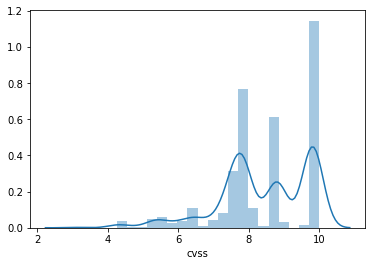

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df1['cvss'])
plt.show()

In [18]:
df1['cvss'].median()

8.8

In [19]:
df1['cvss'] = df1['cvss'].fillna(8.8)

In [20]:
df1['cwe'].nunique()

81

In [21]:
df1['cwe'].unique()

array(['CWE-78', nan, 'CWE-787', 'NVD-CWE-noinfo', 'CWE-918', 'CWE-843',
       'CWE-131', 'CWE-77', 'CWE-521', 'CWE-20', 'CWE-434', 'CWE-290',
       'CWE-89', 'CWE-416', 'CWE-502', 'CWE-22', 'CWE-284', 'CWE-74',
       'CWE-917', 'CWE-190', 'CWE-665', 'CWE-362,CWE-269', 'CWE-79',
       'CWE-120', 'CWE-863', 'CWE-494', 'CWE-134', 'CWE-400', 'CWE-200',
       'CWE-611', 'CWE-862', 'CWE-326', 'CWE-732', 'CWE-119', 'CWE-798',
       'CWE-269', 'CWE-22,CWE-829', 'CWE-306', 'CWE-287',
       'CWE-787,CWE-843', 'CWE-119,CWE-20', 'CWE-22,CWE-94', 'CWE-522',
       'CWE-94', 'CWE-255', 'CWE-264', 'CWE-347', 'CWE-787,CWE-190',
       'CWE-399', 'CWE-787,CWE-416', 'CWE-330', 'CWE-295',
       'CWE-362,CWE-416', 'NVD-CWE-Other', 'CWE-755', 'CWE-77,CWE-787',
       'CWE-552', 'CWE-668', 'CWE-425', 'CWE-94,CWE-306',
       'CWE-287,CWE-697', 'CWE-59', 'CWE-312', 'CWE-285',
       'CWE-640,CWE-287', 'CWE-404', 'CWE-254', 'CWE-125', 'CWE-772',
       'CWE-362', 'CWE-352', 'CWE-78,CWE-755', 'CWE-693

In [22]:
df1['cwe'].mode()

0    NVD-CWE-noinfo
dtype: object

In [23]:
df1['cwe']=df1['cwe'].fillna('NVD-CWE-noinfo')

In [24]:
df1['vector'].nunique()

3

In [25]:
df1['vector'].unique()

array(['NETWORK', nan, 'LOCAL', 'ADJACENT_NETWORK'], dtype=object)

In [26]:
df1['vector'].mode()

0    NETWORK
dtype: object

In [27]:
df1['vector']=df1['vector'].fillna('NETWORK')

In [28]:
df1['complexity'].nunique()

2

In [29]:
df1['complexity'].unique()

array(['LOW', nan, 'HIGH'], dtype=object)

In [30]:
df1['complexity'].mode()

0    LOW
dtype: object

In [31]:
df1['complexity']=df1['complexity'].fillna('LOW')

In [32]:
df1['severity'].mode()

0    HIGH
dtype: object

In [33]:
df1['severity']=df1['severity'].fillna('HIGH')

In [34]:
df1['pub_date'].nunique()

486

In [35]:
df1['pub_date'].unique()

array(['2021-02-16', nan, '2020-06-09', '2021-09-08', '2021-03-31',
       '2021-08-03', '2021-01-12', '2019-09-11', '2019-05-16',
       '2015-11-18', '2020-02-07', '2021-06-09', '2020-11-20',
       '2017-05-12', '2022-01-13', '2021-02-11', '2021-09-02',
       '2018-05-19', '2018-09-25', '2018-02-06', '2020-04-08',
       '2019-10-11', '2020-03-10', '2017-09-15', '2021-10-07',
       '2021-10-05', '2019-04-08', '2016-06-07', '2019-12-30',
       '2020-12-11', '2017-03-11', '2018-08-22', '2021-08-24',
       '2019-03-05', '2020-12-08', '2021-10-19', '2021-04-02',
       '2020-06-05', '2021-04-29', '2021-05-25', '2021-05-10',
       '2019-04-18', '2021-08-30', '2019-06-03', '2019-03-25',
       '2021-10-22', '2020-07-22', '2020-10-21', '2021-05-06',
       '2018-03-28', '2020-02-05', '2020-08-29', '2020-09-23',
       '2020-04-15', '2019-01-24', '2018-06-07', '2019-08-29',
       '2020-07-10', '2019-12-27', '2019-05-22', '2021-01-29',
       '2021-02-02', '2019-07-03', '2017-07-20', '

In [36]:
df1['pub_date'].mode()

0    2018-03-28
dtype: object

In [37]:
df1['pub_date']=df1['pub_date'].fillna('2018-03-28')

In [38]:
df1.isna().sum()

cve_id                0
vendor_project        0
product               0
vulnerability_name    0
date_added            0
required_action       0
due_date              0
grp                   0
pub_date              0
cvss                  0
cwe                   0
vector                0
complexity            0
severity              0
dtype: int64

In [39]:
df1.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 0 to 773
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              3984 non-null   object 
 1   vendor_project      3984 non-null   object 
 2   product             3984 non-null   object 
 3   vulnerability_name  3984 non-null   object 
 4   date_added          3984 non-null   object 
 5   required_action     3984 non-null   object 
 6   due_date            3984 non-null   object 
 7   grp                 3984 non-null   int64  
 8   pub_date            3984 non-null   object 
 9   cvss                3984 non-null   float64
 10  cwe                 3984 non-null   object 
 11  vector              3984 non-null   object 
 12  complexity          3984 non-null   object 
 13  severity            3984 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 466.9+ KB


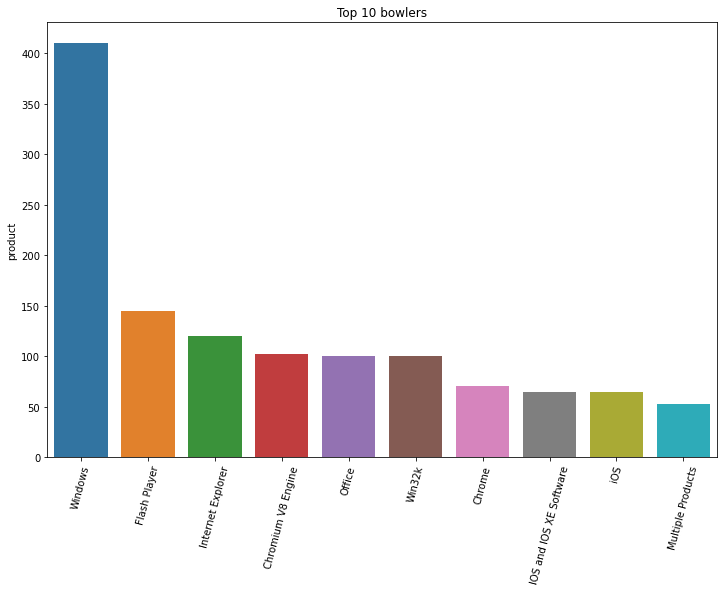

In [41]:
p = df1['product'].value_counts()
p10 = p[:10]
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title('Top 10 bowlers')
sns.barplot(p10.index, p10)

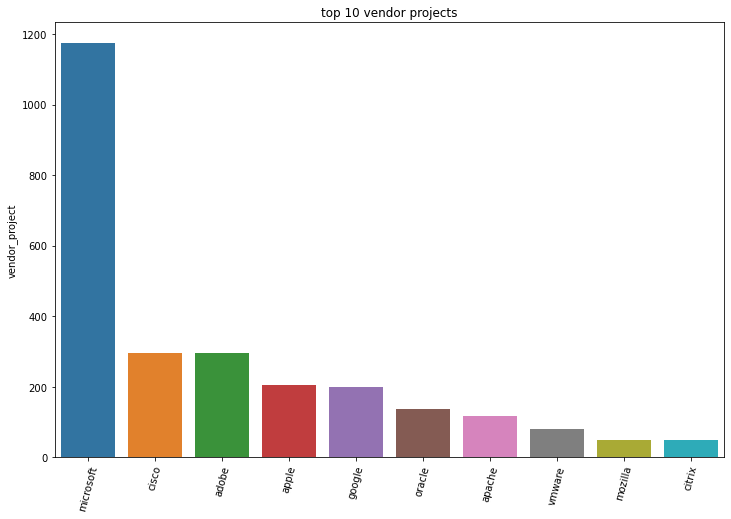

In [42]:
v = df1['vendor_project'].value_counts()
v10=v[:10]
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title("top 10 vendor projects")
sns.barplot(v10.index,v10)

In [43]:
df1['due_date'] = pd.to_datetime(df1['due_date'])
df1['pub_date'] = pd.to_datetime(df1['pub_date'])

In [44]:
df1['dd_year'] = df1['due_date'].dt.year
df1['dd_month'] = df1['due_date'].dt.month
df1['dd_day'] = df1['due_date'].dt.day
df1.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity,dd_year,dd_month,dd_day
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL,2021,11,17
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17


In [45]:
df1['pd_year'] = df1['pub_date'].dt.year
df1['pd_month'] = df1['pub_date'].dt.month
df1['pd_day'] = df1['pub_date'].dt.day
df1.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity,dd_year,dd_month,dd_day,pd_year,pd_month,pd_day
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL,2021,11,17,2021,2,16
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17,2018,3,28
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17,2018,3,28
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17,2018,3,28
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,NVD-CWE-noinfo,NETWORK,LOW,HIGH,2021,11,17,2018,3,28


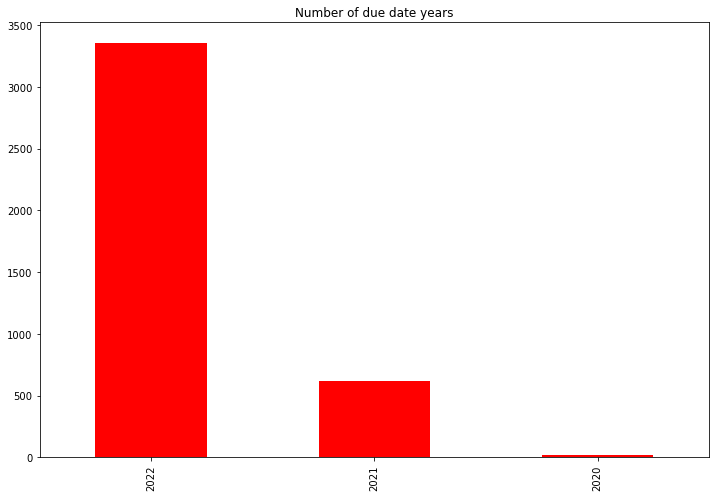

In [46]:
d_years = df1['dd_year'].sort_values().value_counts()
d_years.plot(kind="bar",color='r',title="Number of due date years", figsize=(12,8))

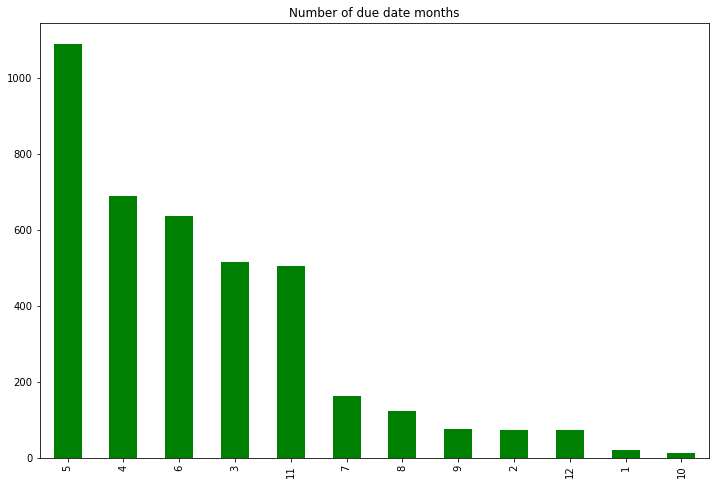

In [47]:
d_mon = df1['dd_month'].sort_values().value_counts()
d_mon.plot(kind="bar",color='g',title="Number of due date months", figsize=(12,8))

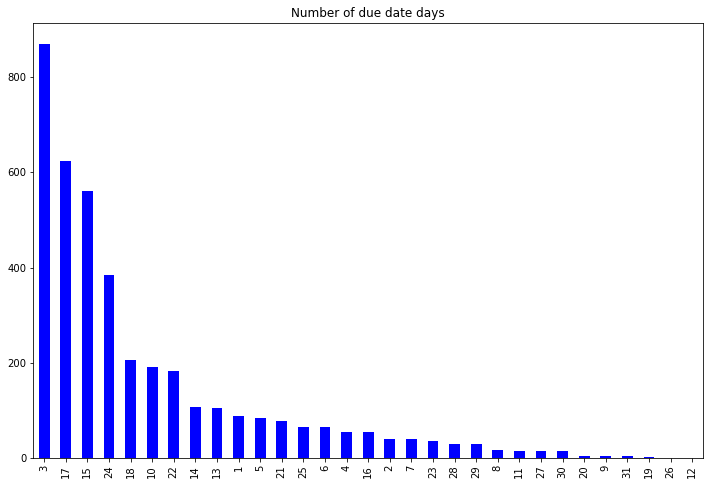

In [48]:
d_day = df1['dd_day'].sort_values().value_counts()
d_day.plot(kind="bar",color='b',title="Number of due date days", figsize=(12,8))

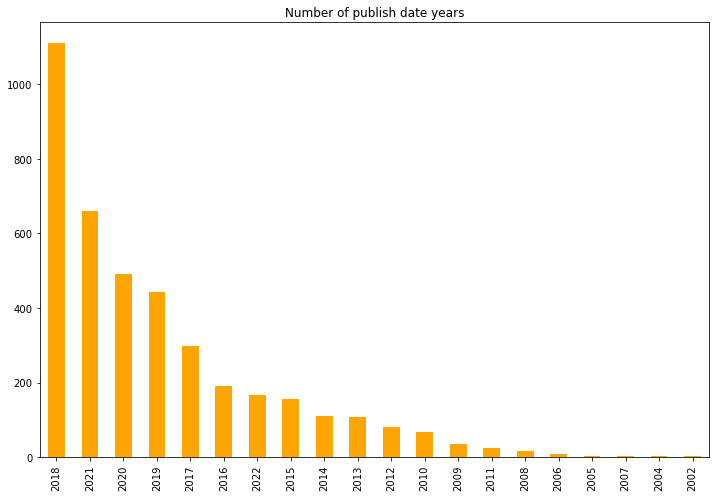

In [49]:
p_year = df1['pd_year'].sort_values().value_counts()
p_year.plot(kind="bar",color='orange',title="Number of publish date years", figsize=(12,8))

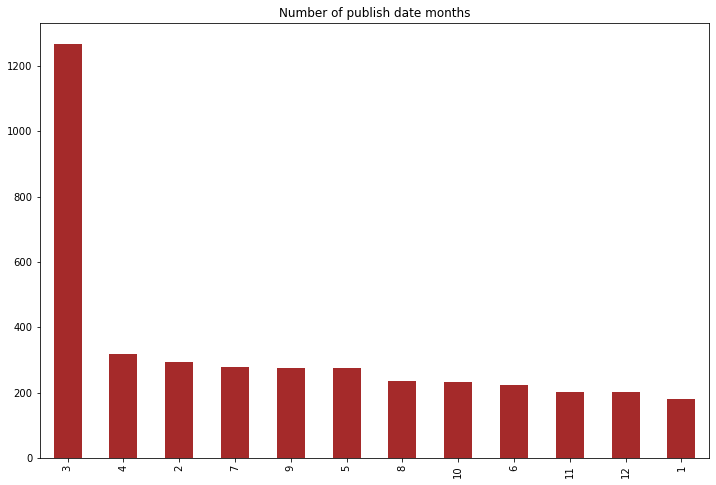

In [50]:
p_day = df1['pd_month'].sort_values().value_counts()
p_day.plot(kind="bar",color='brown',title="Number of publish date months", figsize=(12,8))

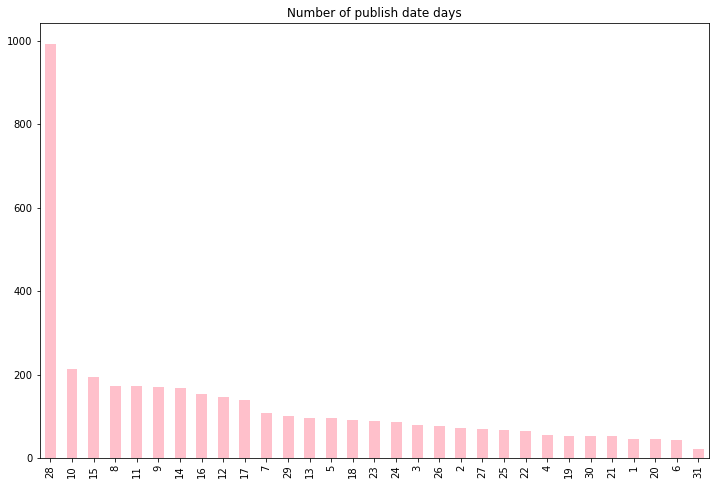

In [51]:
p_day = df1['pd_day'].sort_values().value_counts()
p_day.plot(kind="bar",color='pink',title="Number of publish date days", figsize=(12,8))

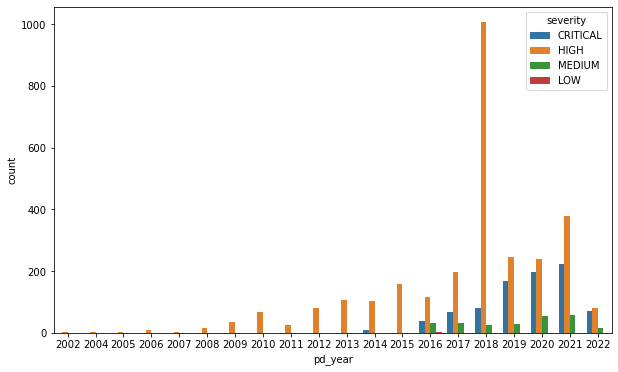

In [52]:
plt.subplots(figsize=(10,6))
sns.countplot(x='pd_year',hue='severity',data=df1)
plt.show()

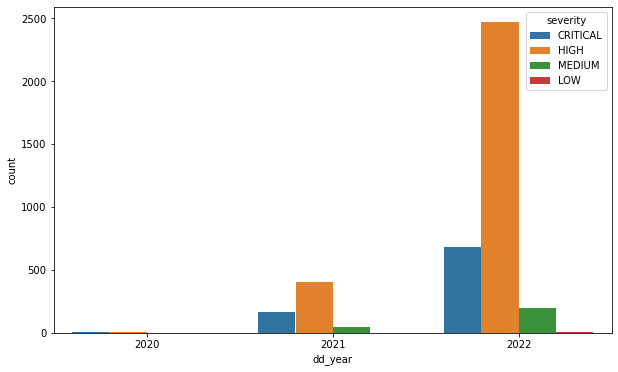

In [53]:
plt.subplots(figsize=(10,6))
sns.countplot(x='dd_year',hue='severity',data=df1)
plt.show()

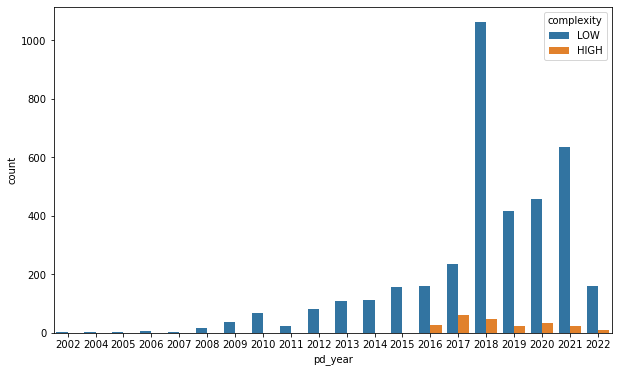

In [54]:
plt.subplots(figsize=(10,6))
sns.countplot(x='pd_year',hue='complexity',data=df1)
plt.show()

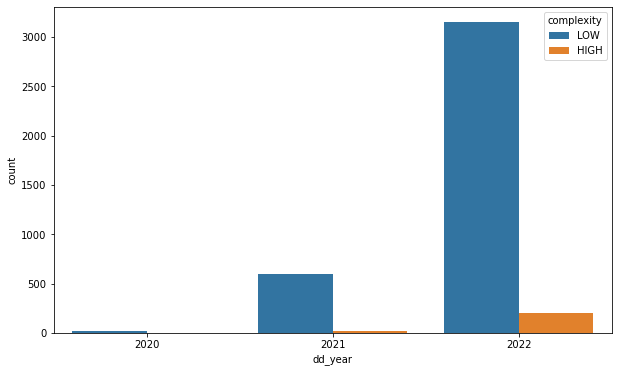

In [55]:
plt.subplots(figsize=(10,6))
sns.countplot(x='dd_year',hue='complexity',data=df1)
plt.show()

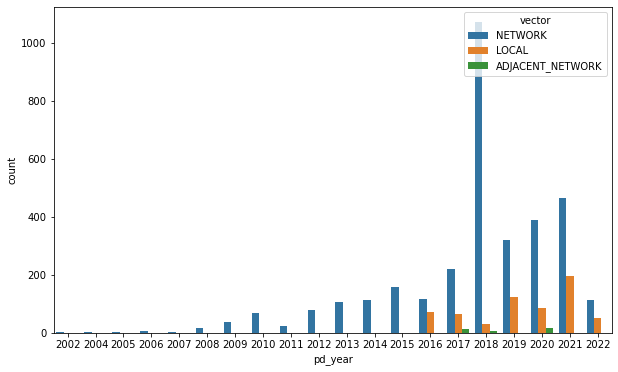

In [56]:
plt.subplots(figsize=(10,6))
sns.countplot(x='pd_year',hue='vector',data=df1)
plt.show()

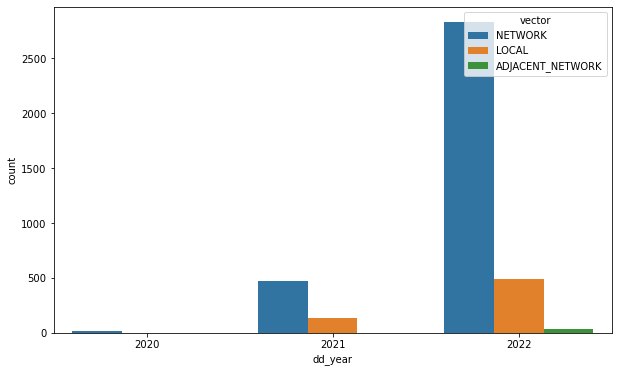

In [57]:
plt.subplots(figsize=(10,6))
sns.countplot(x='dd_year',hue='vector',data=df1)
plt.show()

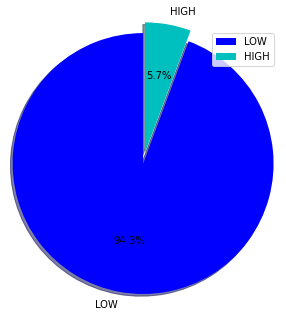

In [58]:
x=df1['complexity'].value_counts()
plt.figure(figsize=(5,5))
label = ['LOW','HIGH']
c=['b','c']
plt.pie(x, labels=label,colors=c,startangle=90,shadow=True,explode = (0,0.1),radius = 1.2,autopct='%.1f%%')
plt.legend()
plt.show()

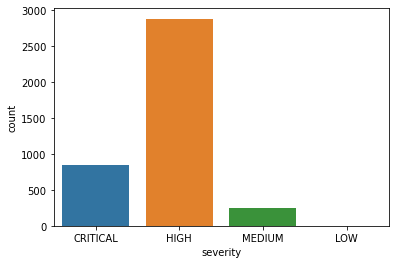

In [59]:
sns.countplot(x='severity', data=df1)

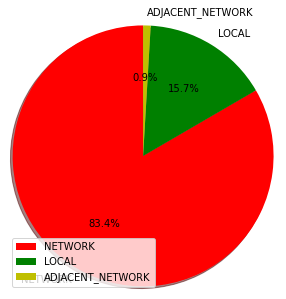

In [60]:
x=df1['vector'].value_counts()
plt.figure(figsize=(5,5))
label = ['NETWORK','LOCAL','ADJACENT_NETWORK']
c=['r','g','y']
plt.pie(x, labels=label,colors=c,startangle=90,shadow=True,radius = 1.2,autopct='%.1f%%')
plt.legend()
plt.show()

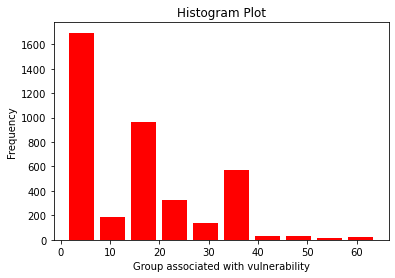

In [61]:
plt.hist(df1['grp'],color='red',rwidth=0.8)
plt.xlabel("Group associated with vulnerability")
plt.ylabel("Frequency")
plt.title("Histogram Plot")
plt.show()

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [63]:
df1['vendor_project'] = label_encoder.fit_transform(df1['vendor_project'])
df1['product'] = label_encoder.fit_transform(df1['product'])
df1['cwe'] = label_encoder.fit_transform(df1['cwe'])
df1['vector'] = label_encoder.fit_transform(df1['vector'])
df1['complexity'] = label_encoder.fit_transform(df1['complexity'])
df1['severity'] = label_encoder.fit_transform(df1['severity'])

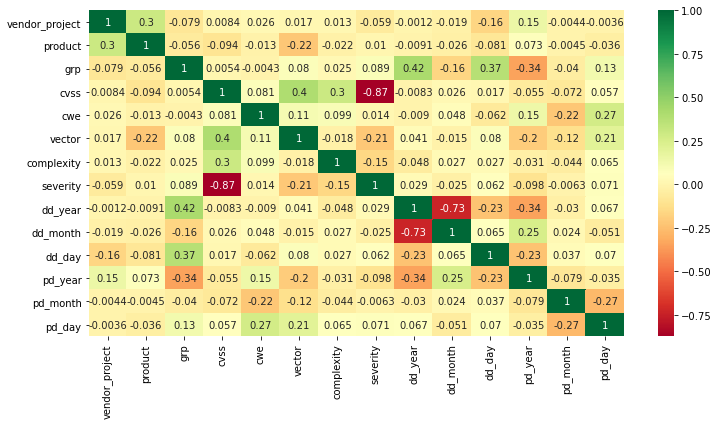

In [67]:
corr = df1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [65]:
df1.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity,dd_year,dd_month,dd_day,pd_year,pd_month,pd_day
0,CVE-2021-27104,0,92,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,62,2,1,0,2021,11,17,2021,2,16
1,CVE-2021-27102,0,92,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,80,2,1,1,2021,11,17,2018,3,28
2,CVE-2021-27101,0,92,Accellion FTA SQL Injection Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,80,2,1,1,2021,11,17,2018,3,28
3,CVE-2021-27103,0,92,Accellion FTA SSRF Vulnerability,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,80,2,1,1,2021,11,17,2018,3,28
4,CVE-2021-21017,1,6,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Apply updates per vendor instructions.,2021-11-17,1,2018-03-28,8.8,80,2,1,1,2021,11,17,2018,3,28


#Questions
1. What are the types of vender project?
2. What are the types of product names?
3. What are the types of vulnerability?
4. What are the types of required action?
5. How many types of vendor projects?
6. How many types of product names?
7. How many types of vulnerability?
8. How many types of required action?
9. In which year most of the vulnerabilities are added?
10. How many groups are there?
11. What is the range of CVSS?
12. What are the number of vulnerabilities over the years?
13. Show the distribution of vulnerabilities across the vectors?
14. What is the distribution of vulnerabilities by complexity level?
15. Top vendors with the highest vulnerabilities
16. Top products with the highest vulnerabilities
17. Top group with the highest vulnerabilities
18. Most common CWE catgeories among vulnerabilities
19. What are the keywords associated to each vulnerability?

